In [160]:
import pandas as pd

In [161]:
df=pd.read_excel('Raisin_Dataset.xlsx')
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [163]:
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

C:\Users\DW-0622\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Area'>

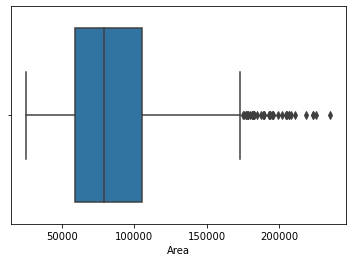

In [164]:
import seaborn as sns
sns.boxplot(df['Area'])

In [165]:
for cols in df.columns[:-1]:
    if df[cols].dtype == object:
        continue
    else:
        Q1 = df[cols].quantile(q=0.25)
        Q3 = df[cols].quantile(q=0.75)
        iqr = Q3 - Q1
    
        low = Q1 - 1.5*(Q3-Q1)
        high = Q3 + 1.5*(Q3-Q1)
        df.loc[(df[cols]<low) | (df[cols]>high),cols] = df[cols].median()

C:\Users\DW-0622\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Area'>

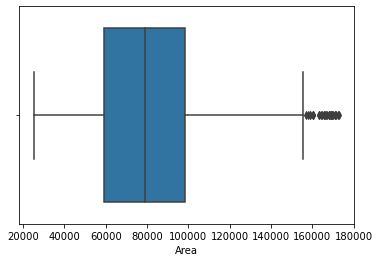

In [166]:
sns.boxplot(df['Area'])

<IPython.core.display.Javascript object>

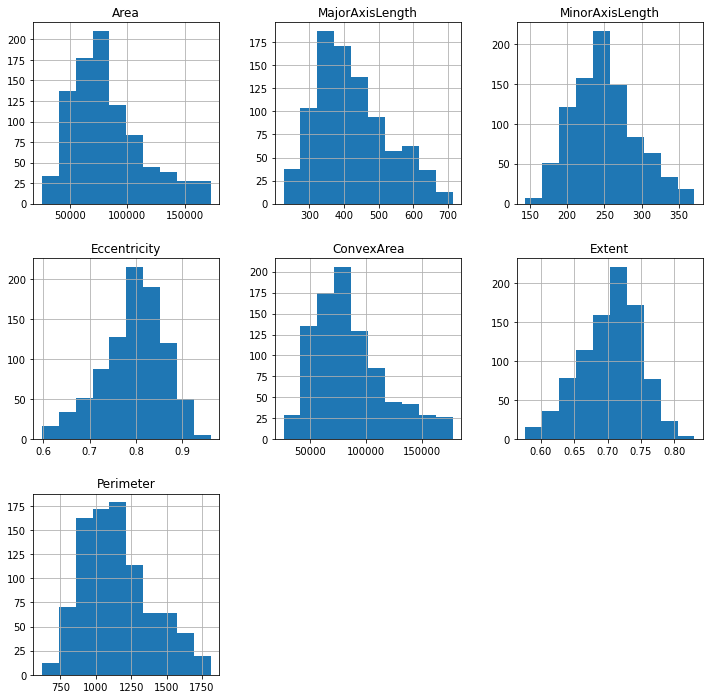

In [167]:
df.hist(figsize = (12,12) , layout=(3,3))
plt.show()

In [168]:
df1=pd.get_dummies(df,drop_first=True)
df1

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class_Kecimen
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.798846,81463,0.792772,1073.251,1
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,0
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,0
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,0
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,0


C:\Users\DW-0622\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Area'>

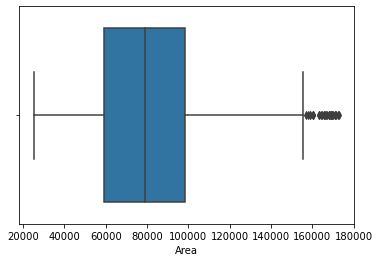

In [169]:
sns.boxplot(df1['Area'])

In [170]:
df1['Class_Kecimen'].value_counts()

1    450
0    450
Name: Class_Kecimen, dtype: int64

C:\Users\DW-0622\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class_Kecimen', ylabel='count'>

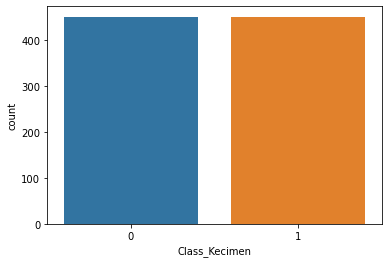

In [171]:
sns.countplot(df1['Class_Kecimen'])

In [172]:
X=df1.drop('Class_Kecimen',axis=1)
y=df1['Class_Kecimen']
print(X.shape)
print(y.shape)

(900, 7)
(900,)


In [173]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(X)

In [174]:
# Now we will split our data set into train test split traing data to fit the model and testing data to predict the new one the ratio i will use will be 80 for traing and 20 for testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled,y,test_size=0.2,random_state=42)

In [175]:
y_train.value_counts()

0    364
1    356
Name: Class_Kecimen, dtype: int64

In [176]:
y_test.value_counts()

1    94
0    86
Name: Class_Kecimen, dtype: int64

In [177]:
# logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_train , y_train)

LogisticRegression(random_state=42)

In [178]:
pred_y = lr.predict(X_test)
pred_t=lr.predict(X_train)

In [179]:
from sklearn.metrics import confusion_matrix , accuracy_score ,precision_score,roc_auc_score,f1_score,recall_score
train=accuracy_score(y_train,pred_t)
test = accuracy_score(y_test , pred_y)
y=roc_auc_score(y_test , pred_y)
print('train:',train)
print('test:',test)
print('ROC:',y)

train: 0.8666666666666667
test: 0.85
ROC: 0.8504453240969817


In [180]:
from sklearn.metrics import confusion_matrix , accuracy_score ,precision_score,roc_auc_score,f1_score,recall_score
cnf_matrix=confusion_matrix(y_test , pred_y)
cnf_matrix

array([[74, 12],
       [15, 79]], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 15.0, 'Predicted label')

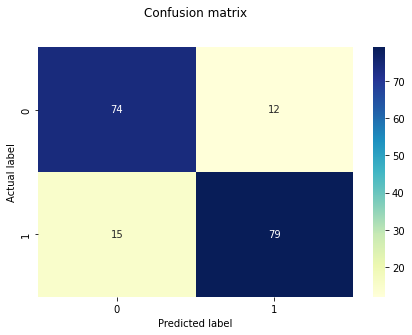

In [181]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [182]:
from sklearn import metrics
result=metrics.classification_report(y_test,pred_y)
print(result)

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        86
           1       0.87      0.84      0.85        94

    accuracy                           0.85       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180



In [183]:
## cross validation of LR
lr_grid={'solver' :['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'penalty':['elasticnet', 'l1', 'l2']}

In [184]:
from sklearn.model_selection import GridSearchCV

In [185]:
grid_lr=GridSearchCV(lr,lr_grid)

In [186]:
grid_lr.fit(X_train,y_train)

C:\Users\DW-0622\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DW-0622\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DW-0622\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DW-0622\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DW-0622\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DW-0622\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWa

GridSearchCV(estimator=LogisticRegression(random_state=42),
             param_grid={'penalty': ['elasticnet', 'l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [187]:
grid_lr.best_params_

{'penalty': 'l1', 'solver': 'liblinear'}

In [188]:
LR=LogisticRegression(penalty='l1',solver='liblinear',random_state=42)

In [189]:
LR.fit(X_train,y_train)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [190]:
y_test_LR=LR.predict(X_test)
y_train_LR=LR.predict(X_train)

In [191]:
print('test:',metrics.accuracy_score(y_test,y_test_LR))
print('train:',metrics.accuracy_score(y_train,y_train_LR))
print('ROC:',metrics.roc_auc_score(y_test,y_test_LR))


test: 0.85
train: 0.8652777777777778
ROC: 0.8504453240969817


In [192]:
cnf_matrix=confusion_matrix(y_test ,y_test_LR )
cnf_matrix

array([[74, 12],
       [15, 79]], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 15.0, 'Predicted label')

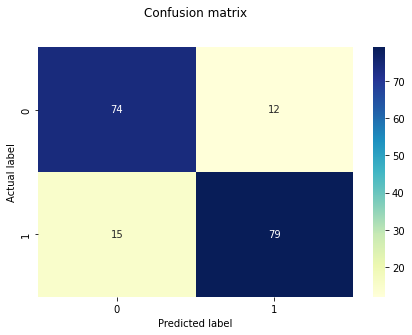

In [193]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [194]:
from sklearn import metrics
result=metrics.classification_report(y_test,y_test_LR)
print(result)

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        86
           1       0.87      0.84      0.85        94

    accuracy                           0.85       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180



In [195]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train , y_train)
pred_y = knn.predict(X_test)
pred_t=knn.predict(X_train)

In [196]:
train=accuracy_score(y_train,pred_t)
test = accuracy_score(y_test , pred_y)
y=roc_auc_score(y_test , pred_y)
print('train:',train)
print('test:',test)
print('ROC:',y)

train: 0.8847222222222222
test: 0.8277777777777777
ROC: 0.8271895101434934


In [197]:
cnf_matrix=confusion_matrix(y_test , pred_y)
cnf_matrix

array([[70, 16],
       [15, 79]], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 15.0, 'Predicted label')

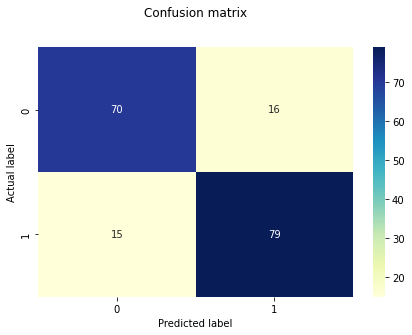

In [198]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [199]:
from sklearn import metrics
result=metrics.classification_report(y_test,pred_y)
print(result)

              precision    recall  f1-score   support

           0       0.82      0.81      0.82        86
           1       0.83      0.84      0.84        94

    accuracy                           0.83       180
   macro avg       0.83      0.83      0.83       180
weighted avg       0.83      0.83      0.83       180



In [200]:
# Cross Validation for KNN
parameter_dict={'n_neighbors':[1,11,21,31,41]}
from sklearn.model_selection import GridSearchCV
grid_df=GridSearchCV(knn,param_grid=parameter_dict)
grid_df.fit(X_train , y_train)
grid_df.best_params_

{'n_neighbors': 41}

In [201]:
knn=KNeighborsClassifier(n_neighbors=41)
knn.fit(X_train , y_train)
pred_y = knn.predict(X_test)
pred_t=knn.predict(X_train)

In [202]:
train=accuracy_score(y_train,pred_t)
test = accuracy_score(y_test , pred_y)
y=roc_auc_score(y_test , pred_y)
print('train:',train)
print('test:',test)
print('ROC:',y)

train: 0.8652777777777778
test: 0.8444444444444444
ROC: 0.8426521523998021


In [203]:
cnf_matrix=confusion_matrix(y_test , pred_y)
cnf_matrix

array([[69, 17],
       [11, 83]], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 15.0, 'Predicted label')

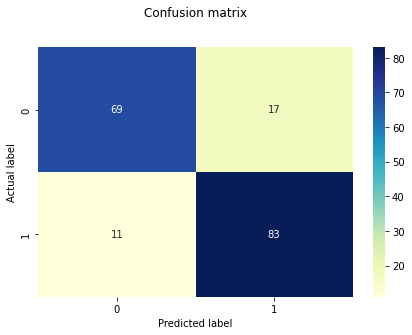

In [204]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [205]:
from sklearn import metrics
result=metrics.classification_report(y_test,pred_y)
print(result)

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        86
           1       0.83      0.88      0.86        94

    accuracy                           0.84       180
   macro avg       0.85      0.84      0.84       180
weighted avg       0.85      0.84      0.84       180



In [206]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train , y_train)
pred_y=dt.predict(X_test)
pred_t=dt.predict(X_train)

In [207]:
train=accuracy_score(y_train,pred_t)
test = accuracy_score(y_test , pred_y)
y=roc_auc_score(y_test , pred_y)
print('train:',train)
print('test:',test)
print('ROC:',y)

train: 1.0
test: 0.7833333333333333
ROC: 0.7846363186541315


In [208]:
cnf_matrix=confusion_matrix(y_test , pred_y)
cnf_matrix

array([[70, 16],
       [23, 71]], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 15.0, 'Predicted label')

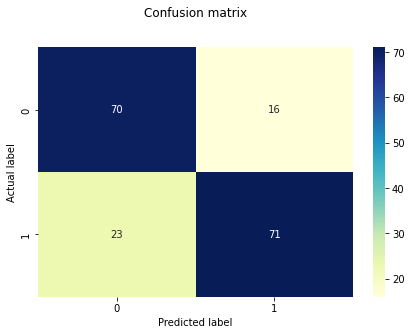

In [209]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [210]:
from sklearn import metrics
result=metrics.classification_report(y_test,pred_y)
print(result)

              precision    recall  f1-score   support

           0       0.75      0.81      0.78        86
           1       0.82      0.76      0.78        94

    accuracy                           0.78       180
   macro avg       0.78      0.78      0.78       180
weighted avg       0.79      0.78      0.78       180



In [211]:
# Cross Validation for DT
parameter_dict={'criterion':['gini','entropy'],'max_depth':[1,30,4],
    'min_samples_split':[1,2,3,4,5]}
grid_model=GridSearchCV(dt,param_grid=parameter_dict)
grid_model.fit(X_train , y_train)

C:\Users\DW-0622\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DW-0622\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DW-0622\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\DW-0622\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a flo

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 30, 4],
                         'min_samples_split': [1, 2, 3, 4, 5]})

In [212]:
grid_model.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}

In [213]:
dt_grid=dt=DecisionTreeClassifier(criterion= 'gini', max_depth= 4, min_samples_split= 2,random_state=42)

In [214]:
dt_grid.fit(X_train, y_train)
y_pred_dt_grid=dt_grid.predict(X_test)
pred_t=dt_grid.predict(X_train)

In [215]:
train=accuracy_score(y_train,pred_t)
test = accuracy_score(y_test ,y_pred_dt_grid )
y = roc_auc_score(y_test , y_pred_dt_grid)
print('train:',train)
print('test:',test)
print('ROc:',y)

train: 0.9013888888888889
test: 0.8388888888888889
ROc: 0.8383226125680356


In [216]:
cnf_matrix=confusion_matrix(y_test ,y_pred_dt_grid )
cnf_matrix

array([[71, 15],
       [14, 80]], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 15.0, 'Predicted label')

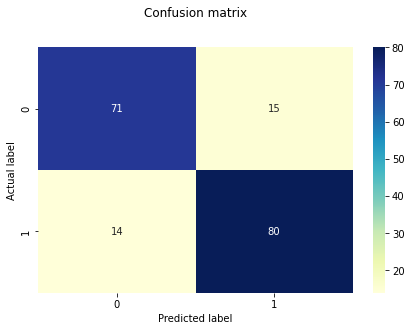

In [217]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [218]:
from sklearn import metrics
result=metrics.classification_report(y_test,pred_y)
print(result)

              precision    recall  f1-score   support

           0       0.75      0.81      0.78        86
           1       0.82      0.76      0.78        94

    accuracy                           0.78       180
   macro avg       0.78      0.78      0.78       180
weighted avg       0.79      0.78      0.78       180



In [219]:
# Random Classfier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train , y_train)
pred_y = rf.predict(X_test)
pred_t=rf.predict(X_train)

In [220]:
train=accuracy_score(y_train,pred_t)
test = accuracy_score(y_test ,pred_y)
y = roc_auc_score(y_test , pred_y)
print('train:',train)
print('test:',test)
print('ROC:',y)

train: 1.0
test: 0.8611111111111112
ROC: 0.8600940128649183


In [221]:
cnf_matrix=confusion_matrix(y_test ,pred_y )
cnf_matrix

array([[72, 14],
       [11, 83]], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 15.0, 'Predicted label')

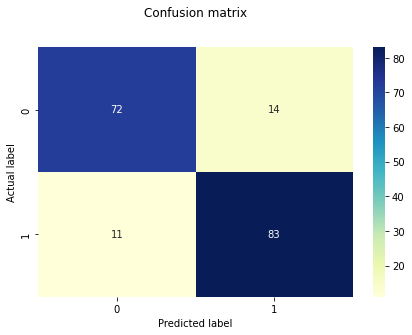

In [222]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [223]:
from sklearn import metrics
result=metrics.classification_report(y_test,pred_y)
print(result)

              precision    recall  f1-score   support

           0       0.87      0.84      0.85        86
           1       0.86      0.88      0.87        94

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180



In [224]:
# SVC
from sklearn.svm import SVC
svm= SVC(random_state=42)
svm.fit(X_train , y_train)
y_pred_svm=svm.predict(X_test)
pred_t=svm.predict(X_train)

In [225]:
train=accuracy_score(y_train,pred_t)
test = accuracy_score(y_test ,y_pred_svm)
y = roc_auc_score(y_test , y_pred_svm)
print('train:',train)
print('test:',test)
print('ROC:',y)

train: 0.875
test: 0.85
ROC: 0.8489609104403761


In [226]:
cnf_matrix=confusion_matrix(y_test , y_pred_svm)
cnf_matrix

array([[71, 15],
       [12, 82]], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 15.0, 'Predicted label')

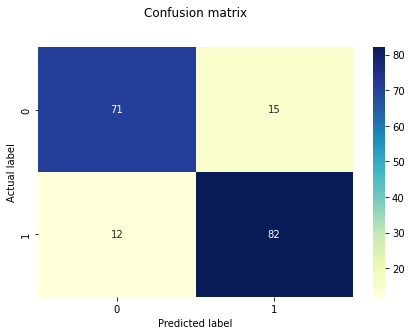

In [227]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [228]:
from sklearn import metrics
result=metrics.classification_report(y_test,y_pred_svm)
print(result)

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        86
           1       0.85      0.87      0.86        94

    accuracy                           0.85       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180



In [229]:
# Naive_bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
y_pred_test=model.predict(X_test)
pred_t=model.predict(X_train)

In [230]:
train=accuracy_score(y_train,pred_t)
test = accuracy_score(y_test ,y_pred_test)
y = roc_auc_score(y_test , y_pred_test)
print('train:',train)
print('test:',test)
print('roc:',y)

train: 0.8458333333333333
test: 0.8666666666666667
roc: 0.8659079663532904


In [231]:
cnf_matrix=confusion_matrix(y_test ,y_pred_test )
cnf_matrix

array([[73, 13],
       [11, 83]], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 15.0, 'Predicted label')

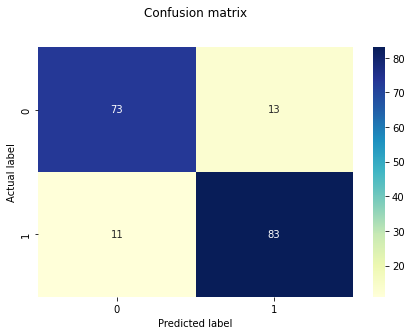

In [232]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [233]:
from sklearn import metrics
result=metrics.classification_report(y_test,y_pred_test)
print(result)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        86
           1       0.86      0.88      0.87        94

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180



In [234]:
# adaboostclassifier
from sklearn.ensemble import AdaBoostClassifier
adaboost=AdaBoostClassifier(random_state=42)
adaboost.fit(X_train,y_train)
y_pred_test=adaboost.predict(X_test)
y_pred_train=adaboost.predict(X_train)

In [235]:
train=accuracy_score(y_train,y_pred_train)
test = accuracy_score(y_test ,y_pred_test)
y = roc_auc_score(y_test , y_pred_test)
print('train:',train)
print('test:',test)
print('roc:',y)

train: 0.9097222222222222
test: 0.8388888888888889
roc: 0.8378278080158338


In [236]:
cnf_matrix=confusion_matrix(y_test ,y_pred_test )
cnf_matrix

array([[70, 16],
       [13, 81]], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 15.0, 'Predicted label')

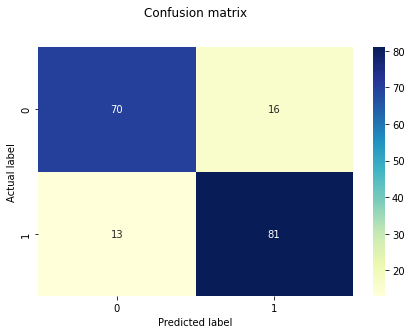

In [237]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [238]:
from sklearn import metrics
result=metrics.classification_report(y_test,y_pred_test)
print(result)

              precision    recall  f1-score   support

           0       0.84      0.81      0.83        86
           1       0.84      0.86      0.85        94

    accuracy                           0.84       180
   macro avg       0.84      0.84      0.84       180
weighted avg       0.84      0.84      0.84       180



In [243]:
 pd.DataFrame({'Models' :['Logistic','KNN','Cross_valid_KNN','Decision Tree','Cross_valid_DT','Random Forest','SVM','Naive_bayes','Adaboostclassifier'],
              'Traing Acc':[0.86,0.88,0.86,1.0,0.9,1.0,0.87,0.84,0.9],
              'Test Acc':[0.85,0.82,0.84,0.78,0.83,0.86,0.85,0.86,0.83],
              'roc_curve':[0.85,0.82,0.84,0.78,0.83,0.86,0.84,0.86,0.83]})

,Models,Traing Acc,Test Acc,roc_curve
0,Logistic,0.86,0.85,0.85
1,KNN,0.88,0.82,0.82
2,Cross_valid_KNN,0.86,0.84,0.84
3,Decision Tree,1.00,0.78,0.78
4,Cross_valid_DT,0.90,0.83,0.83
5,Random Forest,1.00,0.86,0.86
6,SVM,0.87,0.85,0.84
7,Naive_bayes,0.84,0.86,0.86
8,Adaboostclassifier,0.90,0.83,0.83
